<a href="https://colab.research.google.com/github/mburu-mwangi/titanic-dataset/blob/main/Moringa_Data_Science_Core_W9_Independent_Project_2021_10_Alfonce_Mwangi_Python_Naive_Bayes_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Programming: Naive Bayes - Exploratory Data Analysis

## 1. Defining the Question

> Determine whether an email is spam or not

## 2. Reading the Data

In [71]:
# aiding in analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# aiding in engineering and modeling
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [72]:
# Loading the Data from the source i.e. csv
df = pd.read_csv('/content/spambase.csv',header=None)
df.head()
df.shape


(4601, 58)

In [73]:
# x= ["spam/non-spam
# word_freq_make:       
# word_freq_address:    
# word_freq_all:        
# word_freq_3d:         
# word_freq_our:        
# word_freq_over:       
# word_freq_remove:     
# word_freq_internet:   
# word_freq_order:      
# word_freq_mail:        
# word_freq_receive:     
# word_freq_will:         
# word_freq_people:       
# word_freq_report:       
# word_freq_addresses:    
# word_freq_free:         
# word_freq_business:     
# word_freq_email:        
# word_freq_you:          
# word_freq_credit:       
# word_freq_your:         
# word_freq_font:         
# word_freq_000:          
# word_freq_money:        
# word_freq_hp:           
# word_freq_hpl:          
# word_freq_george:       
# word_freq_650:          
# word_freq_lab:          
# word_freq_labs:         
# word_freq_telnet:       
# word_freq_857:          
# word_freq_data:         
# word_freq_415:         
# word_freq_85:           
# word_freq_technology:   
# word_freq_1999:         
# word_freq_parts:        
# word_freq_pm:           
# word_freq_direct:       
# word_freq_cs:           
# word_freq_meeting:      
# word_freq_original:     
# word_freq_project:      
# word_freq_re:           
# word_freq_edu:          
# word_freq_table:        
# word_freq_conference:
# char_freq_;:           
# char_freq_(:            
# char_freq_[:            
# char_freq_!:            
# char_freq_$:            
# char_freq_#:            
# capital_run_length_average: 
# capital_run_length_longest: 
# capital_run_length_total:"]
   



## 3. Checking the Data

In [74]:
# Determining the no. of records in our dataset
#
df.shape

(4601, 58)

In [65]:
# Previewing the top of our dataset
#
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [66]:
# Previewing the bottom of our dataset
# 
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [75]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55      int64
56      int64
57      int64
dtype: object

## 5. Tidying the Dataset

In [76]:
# Identifying the Missing Data
#
df.isnull().any().sum()

0

In [77]:
# Checking for duplicates
#
df.duplicated().sum()


391

In [70]:
# Dropping the duplicated columns
#
# df = df.drop_duplicates()

In [ ]:
# df.duplicated().any()

## 6. Feature Engineering

In [78]:
# acquiring the dependent and independent variables
#

feat= df.drop(columns=[57],axis=1)
X = feat.values
label = df[57]
y = label.values

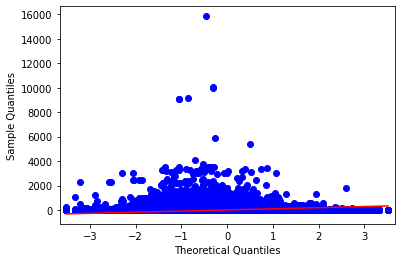

In [79]:
# checking for normality
# using q-q plot

qqplot(feat, line='s')
pyplot.show()

In [80]:
# Confirming the same using shapiro test
# Extracting test statistic and the p_value to compare it to a threshhold
stat,p_val=shapiro(X)
print(stat,p_val)
thresh=0.05
if p_val>thresh:
    print('The feature distribution is Gaussian')
else:
    print('The distribution of features is not Gaussian')

0.03710019588470459 0.0
The distribution of features is not Gaussian


In [81]:
# Splitting our set into training and testing sets
#
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [82]:
# Normalizing the features to fit in between 1 and 0
#
norm=Normalizer(norm='l2')
X_train=norm.fit_transform(X_train)
X_test=norm.transform(X_test)

In [83]:
# Data Reduction
#
lda=LDA(n_components=1,solver='eigen')
# reducing both the training and the testing set
X_train=lda.fit_transform(X_train,y_train)
X_test=lda.transform(X_test)

## 7. Implementing the Solution

In [84]:
# Implementing the Solution
# 
gauss = GaussianNB()
# Fitting our model
gauss.fit(X_train,y_train)
# Predicting the mail status whether spam or not
Y_pred=gauss.predict(X_test)
# Evaluating this model
print(accuracy_score(y_test,Y_pred))
print('*****************************************************************************')
print(confusion_matrix(y_test,Y_pred))
print('*****************************************************************************')
print(classification_report(y_test,Y_pred))


0.7709011943539631
*****************************************************************************
[[473  85]
 [126 237]]
*****************************************************************************
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       558
           1       0.74      0.65      0.69       363

    accuracy                           0.77       921
   macro avg       0.76      0.75      0.75       921
weighted avg       0.77      0.77      0.77       921

